# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Import dependencies.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key.
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude.
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Create an empty list for holding the latitude and longitude combinations.
lat_lngs = []

# Create an empty list for holding the cities names.
cities = []

# Define the min and max latitudes and longitudes.
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) # any value within the interval is equally likely to be drawn
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
print(f'Number of cities in the list: {len(cities)}')

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city.
city_data = []

# Print to logger.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city.
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers.
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list.
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cap malheureux
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | saqqez
Processing Record 4 of Set 1 | moerai
Processing Record 5 of Set 1 | yerbogachen
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | ust-ilimsk
Processing Record 10 of Set 1 | katsuura
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | ampanihy
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | shiraz
Processing Record 23 of Set 1 | clyde 

Processing Record 37 of Set 4 | san luis
Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | akyab
Processing Record 40 of Set 4 | aflu
City not found. Skipping...
Processing Record 41 of Set 4 | maromitsa
Processing Record 42 of Set 4 | jalu
Processing Record 43 of Set 4 | borgo san dalmazzo
Processing Record 44 of Set 4 | vavoua
Processing Record 45 of Set 4 | caborca
Processing Record 46 of Set 4 | umea
Processing Record 47 of Set 4 | bilibino
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | rawson
Processing Record 0 of Set 5 | geraldton
Processing Record 1 of Set 5 | balabac
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | bengkulu
Processing Record 4 of Set 5 | new norfolk
Processing Record 5 of Set 5 | faanui
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | vallenar
Processing Record 8 of Set 5 | namibe
Processing Record 9 of Set 5 | westport
Processing 

Processing Record 26 of Set 8 | yei
Processing Record 27 of Set 8 | charters towers
Processing Record 28 of Set 8 | chipinge
Processing Record 29 of Set 8 | hualmay
Processing Record 30 of Set 8 | kosh-agach
Processing Record 31 of Set 8 | warrington
Processing Record 32 of Set 8 | klyuchi
Processing Record 33 of Set 8 | faya
Processing Record 34 of Set 8 | thinadhoo
Processing Record 35 of Set 8 | huinan
Processing Record 36 of Set 8 | shahpura
Processing Record 37 of Set 8 | eyl
Processing Record 38 of Set 8 | japura
Processing Record 39 of Set 8 | cimislia
Processing Record 40 of Set 8 | la ronge
Processing Record 41 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 42 of Set 8 | aksarka
Processing Record 43 of Set 8 | iwanai
Processing Record 44 of Set 8 | leshukonskoye
Processing Record 45 of Set 8 | nara
Processing Record 46 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 47 of Set 8 | salalah
Processing Record 48 of Set 8 | khatanga
Processing Re

Processing Record 18 of Set 12 | aquiraz
Processing Record 19 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 20 of Set 12 | brigantine
Processing Record 21 of Set 12 | barberton
Processing Record 22 of Set 12 | witu
Processing Record 23 of Set 12 | preobrazheniye
Processing Record 24 of Set 12 | herat
Processing Record 25 of Set 12 | ismailia
Processing Record 26 of Set 12 | kabare
Processing Record 27 of Set 12 | evenskjaer
City not found. Skipping...
Processing Record 28 of Set 12 | hami
Processing Record 29 of Set 12 | port hardy
Processing Record 30 of Set 12 | mount gambier
Processing Record 31 of Set 12 | kyabe
Processing Record 32 of Set 12 | iberia
Processing Record 33 of Set 12 | alamor
Processing Record 34 of Set 12 | santa maria
Processing Record 35 of Set 12 | oda
Processing Record 36 of Set 12 | vilhena
Processing Record 37 of Set 12 | manokwari
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Show record count.
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [5]:
# Display sample data.
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cap malheureux,-19.9842,57.6142,24.70,84,68,6.88,MU,1675203945
1,port lincoln,-34.7333,135.8667,17.05,84,99,7.25,AU,1675203826
2,saqqez,36.2499,46.2735,-5.22,93,28,2.26,IR,1675204174
3,moerai,-22.4333,-151.3333,26.38,74,91,4.47,PF,1675203873
4,yerbogachen,61.2767,108.0108,-35.57,100,76,1.26,RU,1675203951


In [6]:
# Export the DataFrame into a csv.
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data.
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data.
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cap malheureux,-19.9842,57.6142,24.70,84,68,6.88,MU,1675203945
1,port lincoln,-34.7333,135.8667,17.05,84,99,7.25,AU,1675203826
2,saqqez,36.2499,46.2735,-5.22,93,28,2.26,IR,1675204174
3,moerai,-22.4333,-151.3333,26.38,74,91,4.47,PF,1675203873
4,yerbogachen,61.2767,108.0108,-35.57,100,76,1.26,RU,1675203951


In [8]:
# According to the OpenWeather API, `Date` represents Unix time in UTC. Use `gmtime()` to convert it to a `struct_time` object
# in UTC and then `strftime()` to convert the object to a string as specified by the format argument.
city_data_dt = time.strftime('%Y-%m-%d', time.gmtime(city_data_df.loc[0, "Date"]))
city_data_dt

'2023-01-31'

In [9]:
# Compute the min and max values for variables of interest to facilitate setting limits of the axes.
city_data_df[['Lat', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].agg(['max', 'min'])

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
max,78.2186,33.30,100,100,14.92
min,-54.8000,-43.36,7,0,0.00


In [10]:
# Set global figure size and dpi to match the appearances in the starter file.
plt.rcParams["figure.figsize"] = (6.4, 4.8)
plt.rcParams["figure.dpi"] = 100

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

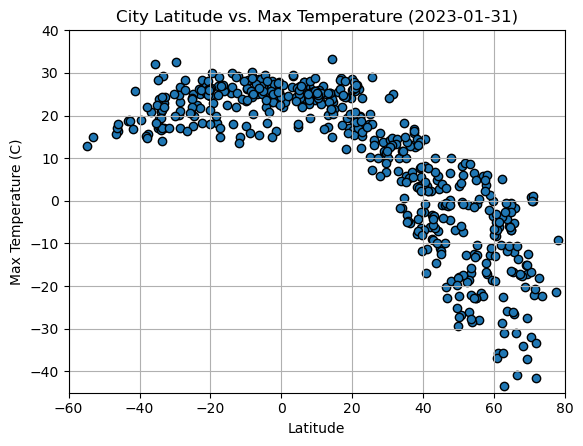

In [11]:
# Build scatter plot for latitude vs. temperature.
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black')

# Incorporate the other graph properties.
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Max Temperature ({city_data_dt})')
plt.xlim(-60, 80)
plt.ylim(-45, 40)
plt.grid()

# Save the figure.
plt.savefig('output_data/Fig1.png')

# Show plot.
plt.show()

#### Latitude Vs. Humidity

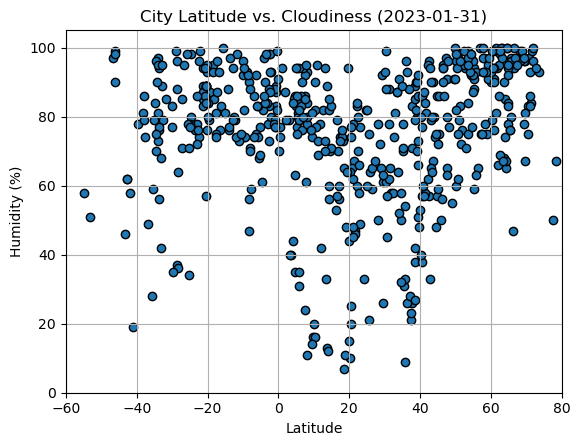

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black')

# Incorporate the other graph properties.
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Cloudiness ({city_data_dt})')
plt.xlim(-60, 80)
plt.ylim(0, 105)
plt.grid()

# Save the figure.
plt.savefig("output_data/Fig2.png")

# Show plot.
plt.show()

#### Latitude Vs. Cloudiness

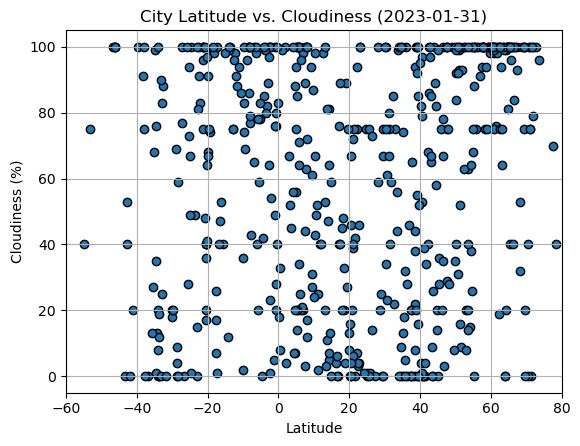

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black')

# Incorporate the other graph properties.
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({city_data_dt})')
plt.xlim(-60, 80)
plt.ylim(-5, 105)
plt.grid()

# Save the figure.
plt.savefig("output_data/Fig3.png")

# Show plot.
plt.show()

#### Latitude vs. Wind Speed Plot

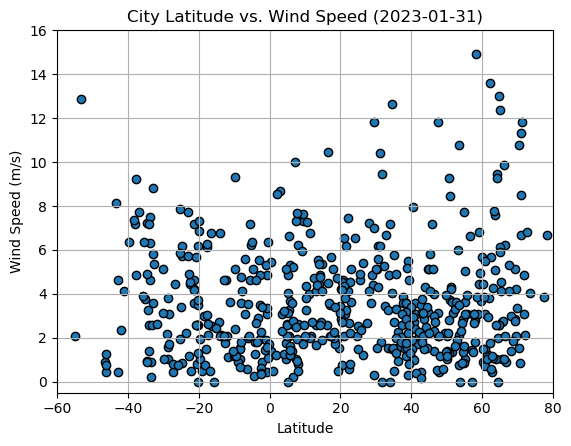

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black')

# Incorporate the other graph properties.
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({city_data_dt})')
plt.xlim(-60, 80)
plt.ylim(-.5, 16)
plt.grid()

# Save the figure.
plt.savefig("output_data/Fig4.png")

# Show plot.
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create linear regression plots.
def linregress_plot(x, y):
    '''
    This function takes two variables of a Dataframe and models their relationship with linear regression. A scatter plot of the
    two variables and the linear model are plotted. The r-value is printed, and the linear model is returned as a string.
    '''
    res = linregress(x, y)
    y_approx = x * res.slope + res.intercept
    line_eq = f'y = {res.slope:.2f}x + {res.intercept:.2f}'
    
    plt.scatter(x, y)
    plt.plot(x, y_approx, 'r-')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    
    print(f'The r-value is: {res.rvalue}')
    return line_eq

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0).
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0])

# Display sample data.
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,saqqez,36.2499,46.2735,-5.22,93,28,2.26,IR,1675204174
4,yerbogachen,61.2767,108.0108,-35.57,100,76,1.26,RU,1675203951
5,kodiak,57.7900,-152.4072,3.73,93,100,3.09,US,1675203534
6,barrow,71.2906,-156.7887,-21.99,84,0,11.83,US,1675203819
7,talnakh,69.4865,88.3972,-17.11,96,100,4.20,RU,1675203950


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0).
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] < 0])

# Display sample data.
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cap malheureux,-19.9842,57.6142,24.70,84,68,6.88,MU,1675203945
1,port lincoln,-34.7333,135.8667,17.05,84,99,7.25,AU,1675203826
3,moerai,-22.4333,-151.3333,26.38,74,91,4.47,PF,1675203873
10,busselton,-33.6500,115.3333,13.95,76,0,7.49,AU,1675203520
12,puerto ayora,-0.7393,-90.3518,27.98,89,76,0.45,EC,1675203838


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8606444754745979


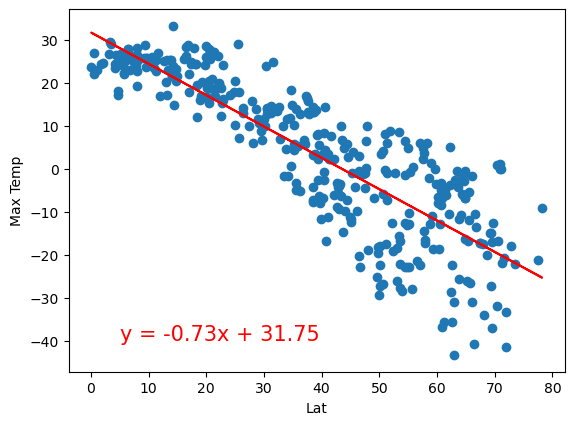

In [18]:
# Linear regression on Northern Hemisphere
line_eq = linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.annotate(line_eq, (5,-40), fontsize=15, color='red')
plt.show()

The r-value is: 0.42762797944597436


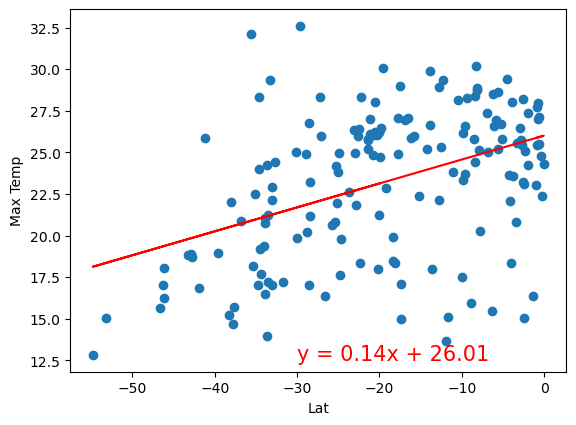

In [19]:
# Linear regression on Southern Hemisphere
line_eq = linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.annotate(line_eq, (-30,12.5), fontsize=15, color='red')
plt.show()

**Discussion about the linear relationship:** The plots above show linear regression modeling of max temperature in relation to latitude. Based on the Pearson correlation coefficients computed, there is a strong negative correlation between latitude and temperature of cities in the northern hemisphere since the $r$-value is greater than 0.7. Moreover, there is a weak positive correlation between latitude and temperature of cities in the southern hemisphere since the $r$-value is less than 0.5 but greater than 0.3.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.36713152900729235


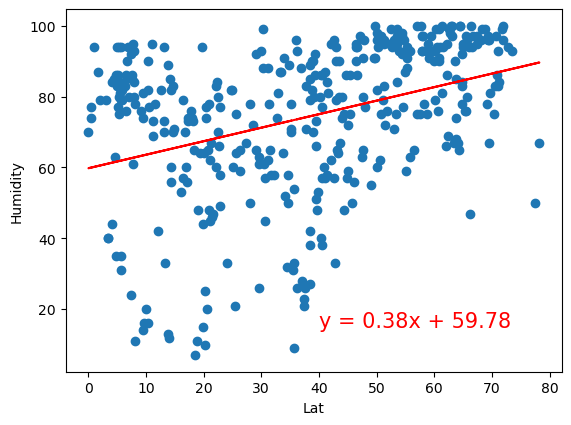

In [20]:
# Northern Hemisphere
line_eq = linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.annotate(line_eq, (40,15), fontsize=15, color='red')
plt.show()

The r-value is: 0.26162075783245603


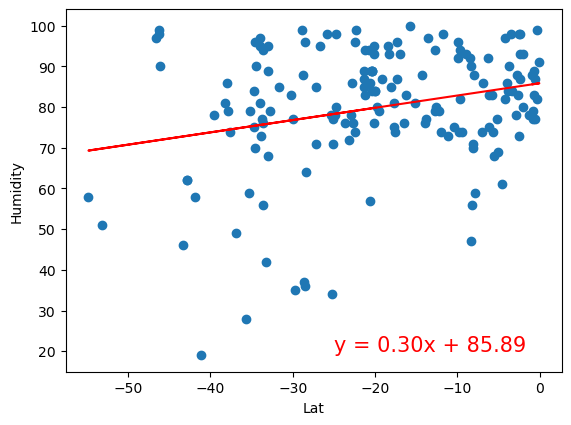

In [21]:
# Southern Hemisphere
line_eq = linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.annotate(line_eq, (-25,20), fontsize=15, color='red')
plt.show()

**Discussion about the linear relationship:** The plots above show linear regression modeling of humidity in relation to latitude. Based on the Pearson correlation coefficients computed, there is a weak positive correlation between latitude and humidity of cities in the northern hemisphere since the $r$-value is less than 0.5 but greater than 0.3. Moreover, the correlation between latitude and humidity of cities in the southern hemisphere is very weak since the $r$-value is less than 0.3.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.294573939468612


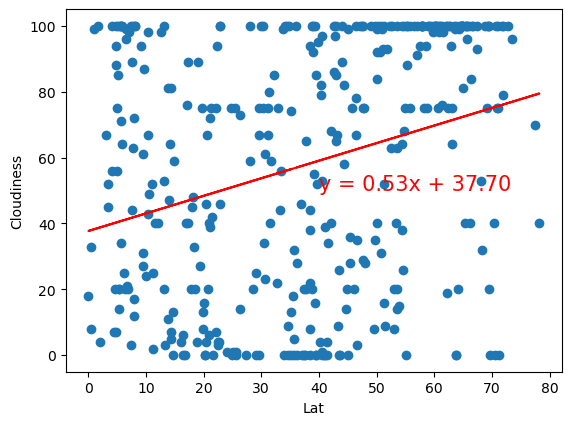

In [22]:
# Northern Hemisphere
line_eq = linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.annotate(line_eq, (40,50), fontsize=15, color='red')
plt.show()

The r-value is: 0.25949977287827014


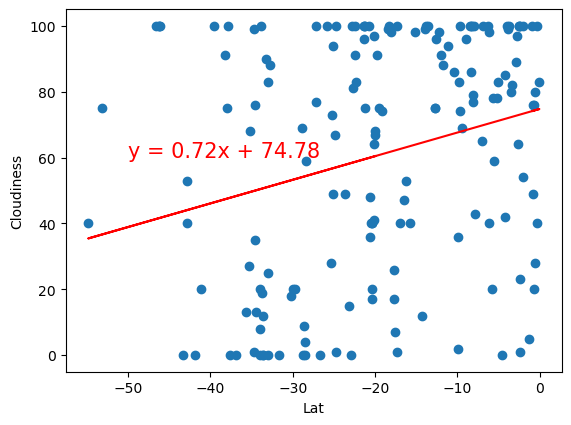

In [23]:
# Southern Hemisphere
line_eq = linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.annotate(line_eq, (-50,60), fontsize=15, color='red')
plt.show()

**Discussion about the linear relationship:** The plots above show linear regression modeling of cloudiness in relation to latitude. Based on the Pearson correlation coefficients computed and the distribution of data points, there is no correlation between latitude and cloudiess in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0588224342878634


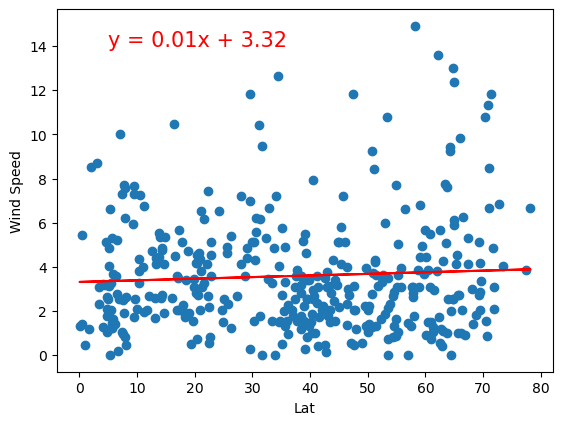

In [24]:
# Northern Hemisphere
line_eq = linregress_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.annotate(line_eq, (5,14), fontsize=15, color='red')
plt.show()

The r-value is: -0.2139578748394274


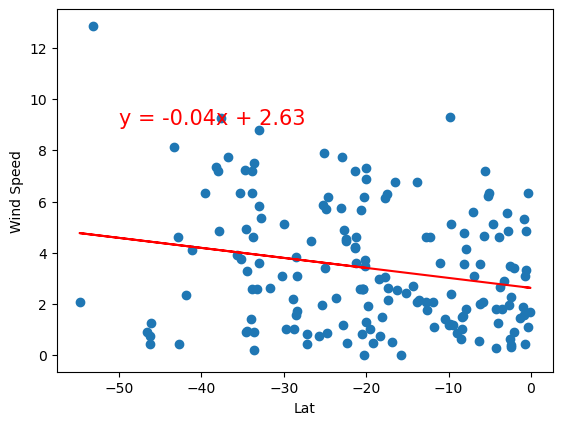

In [25]:
# Southern Hemisphere
line_eq = linregress_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.annotate(line_eq, (-50,9), fontsize=15, color='red')
plt.show()

**Discussion about the linear relationship:** The plots above show linear regression modeling of wind speed in relation to latitude. Based on the Pearson correlation coefficients computed and the distribution of data points, there is no correlation between latitude and wind speed in either hemisphere.